In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/UIT/CS114

/content/drive/MyDrive/UIT/CS114


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:

df=pd.read_csv('/content/drive/MyDrive/UIT/CS114/Wecode/annonimized.csv')
df.head(5)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [6]:
print("\n🧼 Kiểm tra dữ liệu thiếu:")

df.info()



🧼 Kiểm tra dữ liệu thiếu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [7]:
print(df.nunique())

concat('it001',`assignment_id`)       203
concat('it001',`problem_id`)          469
concat('it001', username)            1489
is_final                                2
status                                  4
pre_score                             631
coefficient                             4
concat('it001',`language_id`)           6
created_at                         284530
updated_at                         242976
judgement                           58406
dtype: int64


In [8]:
df = df.rename(columns={
    "concat('it001', username)": "hash",
    "concat('it001',`assignment_id`)": "assignment_id",
    "concat('it001',`problem_id`)": "problem_id",
    "pre_score": "score",
    "coefficient": "late_coef",
    "created_at": "submit_time",
    "updated_at": "judge_time",
    "concat('it001',`language_id`)": "lang_id",
    "judgement": "judgement_json"
})

In [9]:
df.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [20]:

df_th =  pd.read_csv('/content/drive/MyDrive/UIT/CS114/Wecode/th-public.csv')


In [21]:
df_th.head(5)

,hash,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6


In [12]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    761 non-null    object
 1   TH      755 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [22]:
#xử lý null của cột TH
print(df_th.isna().sum())
nan_rows = df_th[df_th.isna().any(axis=1)]
print(nan_rows)

hash    0
TH      6
dtype: int64
                                         hash   TH
38   06024da8147b5cf6105beb4c403f67cf1ff0aea1  NaN
83   0d815307d5307124d148bbebfb41497230c4bd15  NaN
91   0eb93817d6eb3d5bd3e44dbc75971eea193b924f  NaN
195  209d7c77e7a150b6990a3372f7cb24da0c0e7e07  NaN
210  2383a9a33025aa8759fee9a890f6420df0fc8b47  NaN
244  2855b4b4d03c37c94117e615a25e0e321ec8d77a  NaN


In [14]:
#kiểm tra thông tin 6 sinh viên bị NAN điểm TH
nan_hashes = nan_rows['hash'].tolist()
students_with_nan = df[df["hash"].isin(nan_hashes)]
students_with_nan.head(10000)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
55603,7468226d3234f1ddf34ca10eb72ceb28223d9c3f,8c1495329b9727d0ec90edc8c9f0ac71f9785f9d,06024da8147b5cf6105beb4c403f67cf1ff0aea1,1,SCORE,10000,100,it0012,09-05 02:10:23,09-05 02:10:48,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
55604,7468226d3234f1ddf34ca10eb72ceb28223d9c3f,ee79b6ec74701ad76dc37a2ad254231d9ca95ddc,06024da8147b5cf6105beb4c403f67cf1ff0aea1,1,SCORE,10000,100,it0012,09-05 02:20:17,09-05 09:48:20,"{""times"":[0,0,0.12,0,0.38,0.48,0,0,0.07,0.06,0..."
55605,7468226d3234f1ddf34ca10eb72ceb28223d9c3f,b332835a08fa81f97d16e06db6e84040da398c09,06024da8147b5cf6105beb4c403f67cf1ff0aea1,1,SCORE,10000,100,it0012,09-05 02:24:48,09-05 02:25:06,"{""times"":[0,0,0,0,0.02,0,0.02,0,0.02,0,0.02,0,..."
55606,7468226d3234f1ddf34ca10eb72ceb28223d9c3f,80aedb6e299e6cbb8e3f870d7ff7557e7ffa60cc,06024da8147b5cf6105beb4c403f67cf1ff0aea1,0,SCORE,4230,100,it0012,09-05 02:37:02,09-05 02:44:12,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
55607,7468226d3234f1ddf34ca10eb72ceb28223d9c3f,80aedb6e299e6cbb8e3f870d7ff7557e7ffa60cc,06024da8147b5cf6105beb4c403f67cf1ff0aea1,0,SCORE,0,100,it0012,09-05 02:38:08,09-05 02:38:34,"{""times"":[0.01,0.02,0.01,0.02,0.02,0.02,0.02,0..."
...,...,...,...,...,...,...,...,...,...,...,...
262062,2c36c78a351f1103182430948811e7255660b8c6,04681b16ae128da4be6bcdf7ae98b4c294ed20b5,209d7c77e7a150b6990a3372f7cb24da0c0e7e07,0,SCORE,2000,100,it0012,09-05 08:38:39,09-05 08:39:13,"{""times"":[0,0,0,0,0,0,0,0,0,0,0.06,0.02,0.06,0..."
262063,2c36c78a351f1103182430948811e7255660b8c6,c8d2d44eae392d8d1ca6fd92539afe3e50e0c221,209d7c77e7a150b6990a3372f7cb24da0c0e7e07,1,SCORE,10000,100,it0012,09-05 08:51:41,09-05 08:52:01,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
262064,2c36c78a351f1103182430948811e7255660b8c6,1caa82b6f5dd4d3821e16eb5bab47065c2d3fdd2,209d7c77e7a150b6990a3372f7cb24da0c0e7e07,1,SCORE,1739,100,it0012,09-05 08:56:27,09-05 08:56:47,"{""times"":[0,0.01,0,0.06,0,0,0,0,0,0.02,0,0,0,0..."
262065,2c36c78a351f1103182430948811e7255660b8c6,1caa82b6f5dd4d3821e16eb5bab47065c2d3fdd2,209d7c77e7a150b6990a3372f7cb24da0c0e7e07,0,SCORE,0,100,it0012,09-05 09:05:28,09-05 09:05:53,"{""times"":[0.02,0.13,0,1.02,0,0.13,0,1.01,0,0.1..."


In [15]:
#thử kiểm tra xem có sinh viên nào có điểm thực hành là 0 không
zero_th = df_th[df_th['TH'] == 0]
print(zero_th)

Empty DataFrame
Columns: [hash, TH]
Index: []


In [24]:
#có thể các sinh viên có điểm TH = NAN là những sinh viên có điểm thực hành = 0 nhưng trong bảng annonimized.csv
#tạm thời ta sẽ xóa bỏ những sinh viên này thay vi cho họ điểm TH = 0
df_th['TH'] = df_th['TH'].fillna(0)
print(df_th.isna().sum())

hash    0
TH      0
dtype: int64


In [25]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    761 non-null    object
 1   TH      761 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [27]:
#Chuyển dòng TH thành float để dễ so sánh
df_th['TH'] = pd.to_numeric(df_th['TH'], errors='coerce').fillna(0)

In [28]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hash    761 non-null    object 
 1   TH      761 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [29]:
#sắp xếp lại thứ tự theo điểm số
df_th = df_th.sort_values('TH', ascending=False)
df_th.head(5)

,hash,TH
3,013de369c439ab0ead8aa7da64423aa395a8be39,10.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10.0
10,020f253c343856ea875e959023e79fb1d4d9c0a3,10.0
303,33c9e776300c7de11e0736b069b8e5042372d418,10.0
306,346583cc308681a50145af444a26fb217df305c3,10.0


In [30]:
df_th.head(5)

,hash,TH
3,013de369c439ab0ead8aa7da64423aa395a8be39,10.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10.0
10,020f253c343856ea875e959023e79fb1d4d9c0a3,10.0
303,33c9e776300c7de11e0736b069b8e5042372d418,10.0
306,346583cc308681a50145af444a26fb217df305c3,10.0


In [31]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 3 to 38
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hash    761 non-null    object 
 1   TH      761 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.8+ KB


In [32]:
# Chuyển cột thời gian sang kiểu datetime
# Vì dữ liệu không có năm, ta giả định năm 2024 để xử lý
df['submit_time'] = pd.to_datetime('2024-' + df['submit_time'], errors='coerce')
df['judge_time'] = pd.to_datetime('2024-' + df['judge_time'], errors='coerce')

In [33]:
df.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2024-10-09 08:02:04,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2024-10-09 08:04:41,2024-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 08:06:49,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 08:47:52,2024-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 09:19:35,2024-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [34]:
df['status'].unique()

array(['SCORE', 'Compilation Error', 'pending', 'Syntax Error'],
      dtype=object)

In [35]:
custom_map = {
    'SCORE': 3,               # tốt nhất
    'pending': 2,
    'Syntax Error': 1,
    'Compilation Error': 0    # tệ nhất
}

df['status'] = df['status'].map(custom_map)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:


df_encoded = df.copy()
for col in ['assignment_id', 'problem_id', 'lang_id']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [38]:
df_encoded.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:02:04,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:04:41,2024-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:06:49,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,116,335,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:47:52,2024-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,116,212,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 09:19:35,2024-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


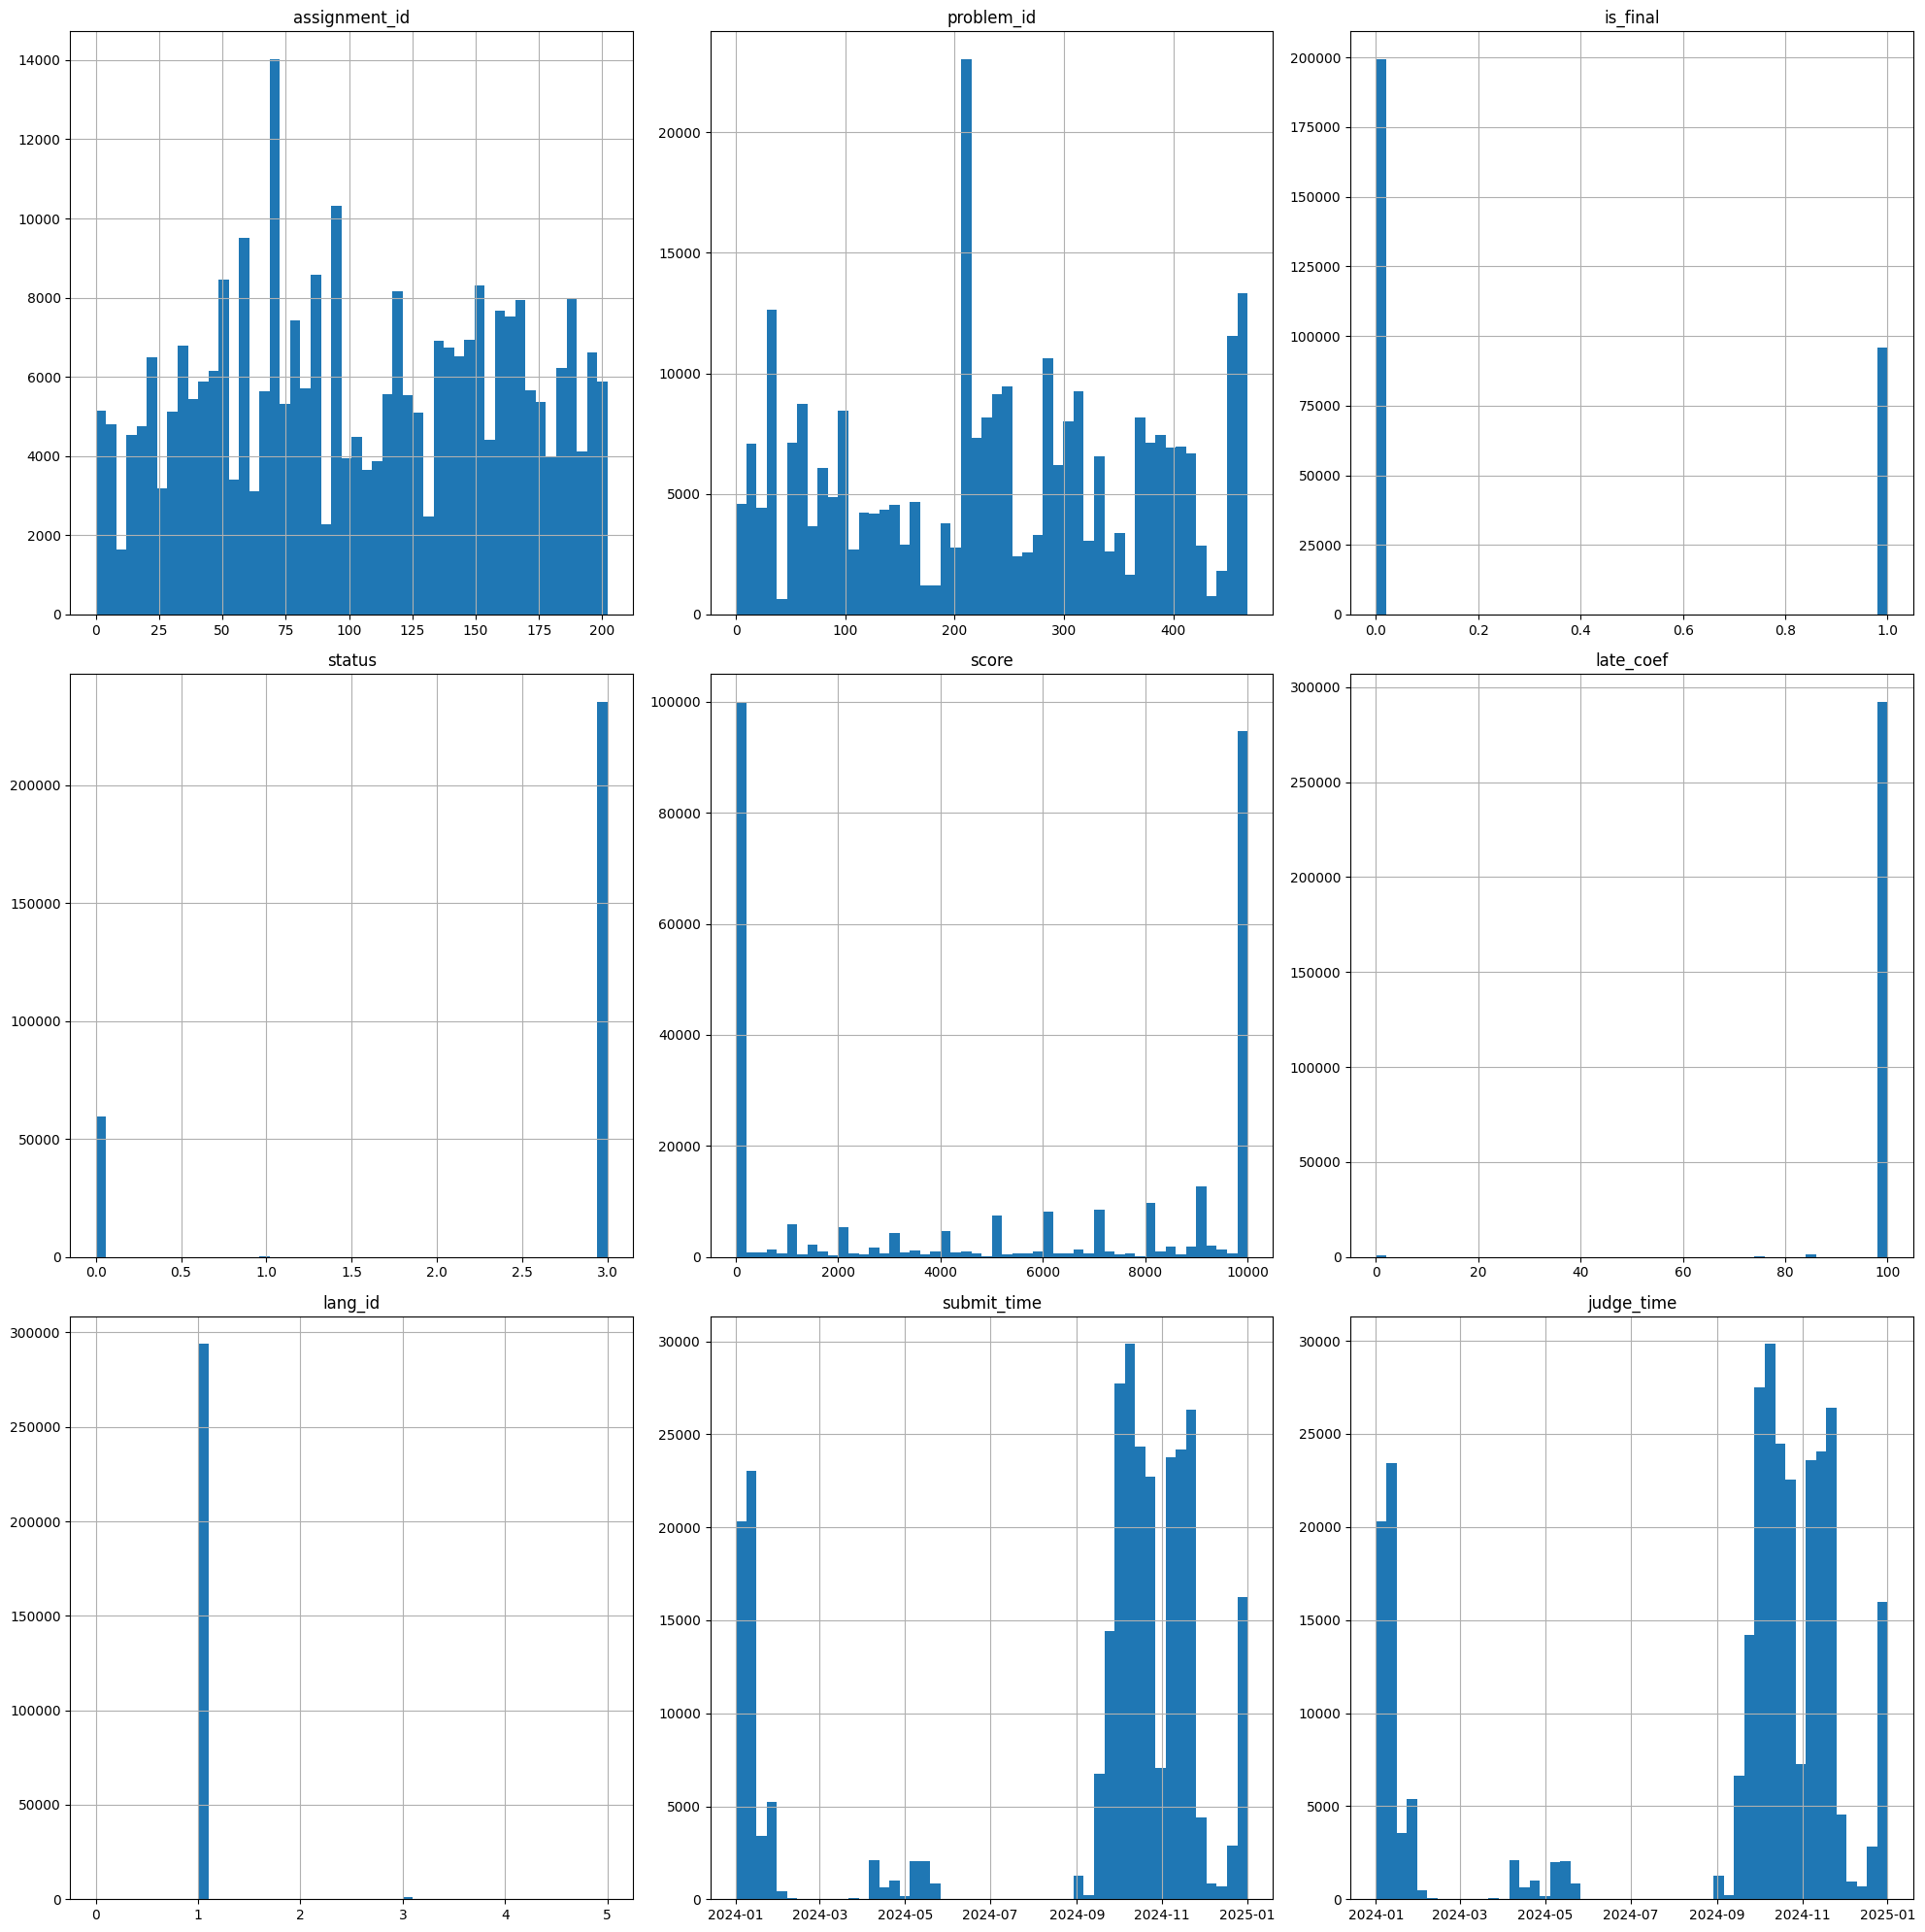

In [39]:
df_encoded.hist(figsize=(20, 20), bins=50)
plt.tight_layout()
plt.show()

In [40]:
df = df_encoded.drop(columns=['judgement_json'])

In [41]:
df.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time
0,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:02:04,2024-10-09 08:06:58
1,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:04:41,2024-10-09 08:04:51
2,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:06:49,2024-10-09 08:06:58
3,116,335,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:47:52,2024-10-09 08:48:01
4,116,212,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 09:19:35,2024-10-09 09:19:45


In [42]:
df_train = pd.DataFrame()


In [43]:
# 1. Tạo danh sách tất cả sinh viên trong df
all_hash = pd.DataFrame({'hash': df['hash'].unique()})

# 2. Gộp thông tin TH từ df_th (sẽ là NaN nếu sinh viên không nằm trong df_th)
df_train = all_hash.merge(df_th, on='hash', how='left')

# 3. Tính tổng số bài nộp từ df
submit_count = df.groupby('hash').size().rename('submit_count').reset_index()

# 4. Gộp submit_count vào df_train2
df_train = df_train.merge(submit_count, on='hash', how='left')

# 5. Điền 0 nếu chưa nộp bài
df_train['submit_count'] = df_train['submit_count'].fillna(0).astype(int)


In [44]:
df_train.info()
df_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hash          1489 non-null   object 
 1   TH            761 non-null    float64
 2   submit_count  1489 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.0+ KB


,hash,TH,submit_count
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172


In [46]:
# 1. Lấy các dòng is_final == 1 từ toàn bộ df
df_final = df[df['is_final'] == 1]

# 2. Tính tổng số bài is_final theo sinh viên
final_submit_count = df_final.groupby('hash').size().rename('final_submit_count').reset_index()

# 3. Gộp vào df_train (đã tạo từ all_hash.merge(df_th, how='left'))
df_train = df_train.merge(final_submit_count, on='hash', how='left')

# 4. Điền 0 nếu sinh viên chưa có bài is_final
df_train['final_submit_count'] = df_train['final_submit_count'].fillna(0).astype(int)


In [47]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83


In [48]:

# 2. Lọc những dòng có is_final == 1
df_final = df[df['is_final'] == 1]
# 3. Tính điểm trung bình của các bài is_final
avg_final_score = df_final.groupby('hash')['score'].mean().rename('avg_final_score')

# 4. Gộp vào df_train
df_train = df_train.merge(avg_final_score, on='hash', how='left')

# 5. Nếu sinh viên không có bài is_final, điền giá trị 0
df_train['avg_final_score'] = df_train['avg_final_score'].fillna(0)


In [49]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566


In [50]:
# Đếm số lượng status đã encode (giá trị từ 0 đến 3)
status_counts = df.groupby(['hash', 'status']).size().unstack(fill_value=0)

# Đặt tên cột lại cho rõ ràng
status_counts.columns = [f'count_status_{int(col)}' for col in status_counts.columns]

# Gộp vào df_train
df_train = df_train.merge(status_counts, on='hash', how='left')

# Điền 0 nếu thiếu
#df_train.fillna(0, inplace=True)

# Ép kiểu về int
df_train[status_counts.columns] = df_train[status_counts.columns].astype(int)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hash                1489 non-null   object 
 1   TH                  761 non-null    float64
 2   submit_count        1489 non-null   int64  
 3   final_submit_count  1489 non-null   int64  
 4   avg_final_score     1489 non-null   float64
 5   count_status_0      1489 non-null   int64  
 6   count_status_1      1489 non-null   int64  
 7   count_status_2      1489 non-null   int64  
 8   count_status_3      1489 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 104.8+ KB


In [52]:
# 2. Đếm số lượng lang_id khác nhau theo từng sinh viên
lang_count = df.groupby('hash')['lang_id'].nunique().rename('lang_count')

# 3. Gộp vào df_train
df_train = df_train.merge(lang_count, on='hash', how='left')

# 4. Điền 0 nếu sinh viên chưa nộp bài nào (hiếm)
df_train['lang_count'] = df_train['lang_count'].fillna(0).astype(int)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1


In [53]:
# 2. Tính trung bình late_coef
avg_late_coef = df.groupby('hash')['late_coef'].mean().rename('avg_late_coef')

# 3. Gộp vào df_train
df_train = df_train.merge(avg_late_coef, on='hash', how='left')

# 4. Điền 0 nếu không có bài nào
df_train['avg_late_coef'] = df_train['avg_late_coef'].fillna(0)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count,avg_late_coef
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1,100.0
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1,100.0
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1,100.0
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1,100.0
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1,100.0


In [54]:
# 2. Đếm số lần nộp cho mỗi bài
submit_counts = df.groupby(['hash', 'problem_id']).size().reset_index(name='submission_count')

# 3. Tính trung bình số lần nộp lại mỗi bài của mỗi sinh viên
avg_resubmit = submit_counts.groupby('hash')['submission_count'].mean().rename('avg_submission_per_problem')

# 4. Gộp vào df_train
df_train = df_train.merge(avg_resubmit, on='hash', how='left')

# 5. Điền 0 nếu sinh viên chưa nộp bài nào
df_train['avg_submission_per_problem'] = df_train['avg_submission_per_problem'].fillna(0)


In [55]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count,avg_late_coef,avg_submission_per_problem
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1,100.0,2.396552
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1,100.0,2.848214
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1,100.0,4.074074
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1,100.0,2.245455
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1,100.0,2.072289


In [56]:
# Lấy thời gian nộp sớm nhất và chấm muộn nhất cho từng bài
earliest = df[['hash', 'problem_id', 'submit_time']].groupby(['hash', 'problem_id'], as_index=False).min()
latest = df[['hash', 'problem_id', 'judge_time']].groupby(['hash', 'problem_id'], as_index=False).max()

# Tính chênh lệch thời gian làm bài (giây)
time_diff = earliest.merge(latest, on=['hash', 'problem_id'])
time_diff['time'] = (time_diff['judge_time'] - time_diff['submit_time']).dt.total_seconds()

# Trung bình thời gian làm bài theo từng sinh viên
average_time = time_diff.groupby('hash', as_index=False)['time'].mean()
average_time.rename(columns={'time': 'average_time'}, inplace=True)

# Gộp vào df_train
df_train = df_train.merge(average_time, on='hash', how='left')
df_train['average_time'] = df_train['average_time'].fillna(0)
df_train['average_time'] = df_train['average_time'].astype(int)

In [57]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count,avg_late_coef,avg_submission_per_problem,average_time
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1,100.0,2.396552,6418
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1,100.0,2.848214,909848
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1,100.0,4.074074,106527
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1,100.0,2.245455,603250
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1,100.0,2.072289,20048


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hash                        1489 non-null   object 
 1   TH                          761 non-null    float64
 2   submit_count                1489 non-null   int64  
 3   final_submit_count          1489 non-null   int64  
 4   avg_final_score             1489 non-null   float64
 5   count_status_0              1489 non-null   int64  
 6   count_status_1              1489 non-null   int64  
 7   count_status_2              1489 non-null   int64  
 8   count_status_3              1489 non-null   int64  
 9   lang_count                  1489 non-null   int64  
 10  avg_late_coef               1489 non-null   float64
 11  avg_submission_per_problem  1489 non-null   float64
 12  average_time                1489 non-null   int64  
dtypes: float64(4), int64(8), object(1

In [59]:
df_train.to_csv('df_train.csv', index=False)

In [60]:
!pip install xgboost scikit-learn


In [61]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Lọc những dòng có TH
df_train_clean = df_train[df_train['TH'].notna()]

# Tách X và y
X = df_train_clean.drop(columns=['TH', 'hash'])  # hash là định danh, không cần
y = df_train_clean['TH']


In [62]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 2 to 1488
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hash                        761 non-null    object 
 1   TH                          761 non-null    float64
 2   submit_count                761 non-null    int64  
 3   final_submit_count          761 non-null    int64  
 4   avg_final_score             761 non-null    float64
 5   count_status_0              761 non-null    int64  
 6   count_status_1              761 non-null    int64  
 7   count_status_2              761 non-null    int64  
 8   count_status_3              761 non-null    int64  
 9   lang_count                  761 non-null    int64  
 10  avg_late_coef               761 non-null    float64
 11  avg_submission_per_problem  761 non-null    float64
 12  average_time                761 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memo

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Khởi tạo mô hình
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Lưới tham số cần thử
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Huấn luyện
grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Gán model tốt nhất nếu cần lưu dùng tiếp
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}
Best Score (Negative MSE): -3.658804784241508


In [70]:
# Dự đoán
y_pred = grid_search.best_estimator_.predict(X_test)

# Đánh giá
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 4.2711218884503435
R²: 0.1546198107987764


In [71]:
import joblib

# Lưu mô hình tốt nhất vào file
joblib.dump(grid_search.best_estimator_, 'best_model2.pkl')


['best_model2.pkl']

In [72]:
# 1. Lọc những sinh viên có TH là NaN
df_predict_only_nan = df_train[df_train['TH'].isna()].copy()

# 2. Tạo tập dữ liệu đầu vào X (loại bỏ 'hash' và 'TH')
X_nan = df_predict_only_nan.drop(columns=['hash', 'TH'], errors='ignore')

# 3. Dự đoán
y_pred_nan = grid_search.best_estimator_.predict(X_nan)

# 4. Gộp kết quả vào DataFrame
df_result_nan = df_predict_only_nan[['hash']].copy()
df_result_nan['TH'] = y_pred_nan

# 5. Xuất ra file CSV
df_result_nan.to_csv('prediction_nan_only2.csv', index=False)

print("✅ Đã xuất kết quả dự đoán cho sinh viên có TH là NaN.")


✅ Đã xuất kết quả dự đoán cho sinh viên có TH là NaN.


In [73]:
df_predict_only_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hash                        728 non-null    object 
 1   TH                          0 non-null      float64
 2   submit_count                728 non-null    int64  
 3   final_submit_count          728 non-null    int64  
 4   avg_final_score             728 non-null    float64
 5   count_status_0              728 non-null    int64  
 6   count_status_1              728 non-null    int64  
 7   count_status_2              728 non-null    int64  
 8   count_status_3              728 non-null    int64  
 9   lang_count                  728 non-null    int64  
 10  avg_late_coef               728 non-null    float64
 11  avg_submission_per_problem  728 non-null    float64
 12  average_time                728 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memo

In [74]:
# 1. Tạo tập dữ liệu đầu vào X (loại bỏ 'hash' và 'TH')
X_all = df_train.drop(columns=['hash', 'TH'], errors='ignore')

# 2. Dự đoán
y_pred_all = grid_search.best_estimator_.predict(X_all)

# 3. Gộp kết quả vào DataFrame
df_result_all = df_train[['hash']].copy()
df_result_all['TH'] = y_pred_all

# 4. Xuất ra file CSV
df_result_all.to_csv('prediction_all_students.csv', index=False)

print("✅ Đã xuất kết quả dự đoán cho tất cả sinh viên.")


✅ Đã xuất kết quả dự đoán cho tất cả sinh viên.
